In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
from xgboost import XGBClassifier
from sklearn.preprocessing import OrdinalEncoder

# Za obican model

In [3]:
X_train = pd.read_csv('./X_train.csv')
y_train = pd.read_csv('./y_train.csv')
X_test = pd.read_csv('./X_test.csv')
y_test = pd.read_csv('./y_test.csv')

# Za SMOTE

In [4]:
%store -r class_weight
%store -r X_train_SMOTE
%store -r y_train_SMOTE
X_train = pd.DataFrame(X_train.iloc[:, :-1], columns=X_train.columns[:-1])
X_test = pd.DataFrame(X_test.iloc[:, :-1], columns=X_test.columns[:-1])
y_train_SMOTE = pd.DataFrame(y_train_SMOTE, columns=['Tip'])
X_train_SMOTE = pd.DataFrame(X_train_SMOTE.iloc[:, :-1], columns=X_train_SMOTE.columns[:-1])

In [7]:
oe = OrdinalEncoder()

In [8]:
oe.fit(y_train)

OrdinalEncoder()

In [9]:
y_train = pd.DataFrame(oe.transform(y_train), columns=y_train.columns)['Tip']

In [10]:
y_test = pd.DataFrame(oe.transform(y_test), columns=y_test.columns)['Tip']

In [11]:
oe.fit(y_train_SMOTE)

OrdinalEncoder()

In [12]:
y_train_SMOTE = pd.DataFrame(oe.transform(y_train_SMOTE), columns=y_train_SMOTE.columns)['Tip']

**Model treniran nad obicnim podacima**

In [25]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.2],
    'max_leaves': [0, 5],
    'booster': ['gbtree', 'gblinear'],
}

clf = XGBClassifier(objective="multi:softmax", random_state=42, num_class=5)

grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', verbose=4)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_clf = XGBClassifier(objective="multi:softmax", random_state=42, num_class=5, **best_params)
best_clf.fit(X_train, y_train)

y_pred_best = best_clf.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best, average='weighted')
recall_best = recall_score(y_test, y_pred_best, average='weighted')
f1_best = f1_score(y_test, y_pred_best, average='weighted')

classification_rep = classification_report(y_test, y_pred_best)
feature_importance_dict = best_clf.get_booster().get_score(importance_type='gain')

print("\nNajbolji parametri:", best_params)
print("Tacnost modela sa najboljim parametrima:", round(accuracy_best, 5))
print("Precision modela sa najboljim parametrima:", round(precision_best, 5))
print("Recall modela sa najboljim parametrima:", round(recall_best, 5))
print("F1 score modela sa najboljim parametrima:", round(f1_best, 5))
#print("\nIzvestaj o klasifikaciji:\n", classification_rep)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END booster=gbtree, learning_rate=0.1, max_leaves=0, n_estimators=100;, score=0.795 total time=   0.9s
[CV 2/5] END booster=gbtree, learning_rate=0.1, max_leaves=0, n_estimators=100;, score=0.803 total time=   0.8s
[CV 3/5] END booster=gbtree, learning_rate=0.1, max_leaves=0, n_estimators=100;, score=0.884 total time=   0.8s
[CV 4/5] END booster=gbtree, learning_rate=0.1, max_leaves=0, n_estimators=100;, score=0.843 total time=   0.8s
[CV 5/5] END booster=gbtree, learning_rate=0.1, max_leaves=0, n_estimators=100;, score=0.843 total time=   0.9s
[CV 1/5] END booster=gbtree, learning_rate=0.1, max_leaves=0, n_estimators=200;, score=0.795 total time=   1.3s
[CV 2/5] END booster=gbtree, learning_rate=0.1, max_leaves=0, n_estimators=200;, score=0.787 total time=   1.2s
[CV 3/5] END booster=gbtree, learning_rate=0.1, max_leaves=0, n_estimators=200;, score=0.876 total time=   1.2s
[CV 4/5] END booster=gbtree, learning_rate

C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:16:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:16:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/5] END booster=gblinear, learning_rate=0.1, max_leaves=0, n_estimators=100;, score=0.623 total time=   0.0s
[CV 3/5] END booster=gblinear, learning_rate=0.1, max_leaves=0, n_estimators=100;, score=0.653 total time=   0.0s


C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:16:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:16:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 4/5] END booster=gblinear, learning_rate=0.1, max_leaves=0, n_estimators=100;, score=0.661 total time=   0.0s
[CV 5/5] END booster=gblinear, learning_rate=0.1, max_leaves=0, n_estimators=100;, score=0.636 total time=   0.0s


C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:16:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:16:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/5] END booster=gblinear, learning_rate=0.1, max_leaves=0, n_estimators=200;, score=0.574 total time=   0.1s


C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:16:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/5] END booster=gblinear, learning_rate=0.1, max_leaves=0, n_estimators=200;, score=0.623 total time=   0.1s


C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:16:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/5] END booster=gblinear, learning_rate=0.1, max_leaves=0, n_estimators=200;, score=0.661 total time=   0.1s
[CV 4/5] END booster=gblinear, learning_rate=0.1, max_leaves=0, n_estimators=200;, score=0.661 total time=   0.1s


C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:16:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:16:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 5/5] END booster=gblinear, learning_rate=0.1, max_leaves=0, n_estimators=200;, score=0.636 total time=   0.1s


C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:16:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/5] END booster=gblinear, learning_rate=0.1, max_leaves=0, n_estimators=300;, score=0.639 total time=   0.2s


C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:16:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/5] END booster=gblinear, learning_rate=0.1, max_leaves=0, n_estimators=300;, score=0.697 total time=   0.2s


C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:16:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/5] END booster=gblinear, learning_rate=0.1, max_leaves=0, n_estimators=300;, score=0.736 total time=   0.2s


C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:16:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 4/5] END booster=gblinear, learning_rate=0.1, max_leaves=0, n_estimators=300;, score=0.686 total time=   0.2s


C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:16:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 5/5] END booster=gblinear, learning_rate=0.1, max_leaves=0, n_estimators=300;, score=0.653 total time=   0.2s
[CV 1/5] END booster=gblinear, learning_rate=0.1, max_leaves=5, n_estimators=100;, score=0.566 total time=   0.0s


C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:16:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:16:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/5] END booster=gblinear, learning_rate=0.1, max_leaves=5, n_estimators=100;, score=0.615 total time=   0.0s
[CV 3/5] END booster=gblinear, learning_rate=0.1, max_leaves=5, n_estimators=100;, score=0.653 total time=   0.0s


C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:16:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:16:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 4/5] END booster=gblinear, learning_rate=0.1, max_leaves=5, n_estimators=100;, score=0.661 total time=   0.0s
[CV 5/5] END booster=gblinear, learning_rate=0.1, max_leaves=5, n_estimators=100;, score=0.636 total time=   0.0s


C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:16:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:16:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/5] END booster=gblinear, learning_rate=0.1, max_leaves=5, n_estimators=200;, score=0.574 total time=   0.1s
[CV 2/5] END booster=gblinear, learning_rate=0.1, max_leaves=5, n_estimators=200;, score=0.623 total time=   0.1s


C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:16:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:16:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/5] END booster=gblinear, learning_rate=0.1, max_leaves=5, n_estimators=200;, score=0.661 total time=   0.1s
[CV 4/5] END booster=gblinear, learning_rate=0.1, max_leaves=5, n_estimators=200;, score=0.661 total time=   0.1s


C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:16:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:16:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 5/5] END booster=gblinear, learning_rate=0.1, max_leaves=5, n_estimators=200;, score=0.636 total time=   0.1s


C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:16:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/5] END booster=gblinear, learning_rate=0.1, max_leaves=5, n_estimators=300;, score=0.631 total time=   0.2s


C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:16:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/5] END booster=gblinear, learning_rate=0.1, max_leaves=5, n_estimators=300;, score=0.697 total time=   0.2s


C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:16:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/5] END booster=gblinear, learning_rate=0.1, max_leaves=5, n_estimators=300;, score=0.736 total time=   0.2s


C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:16:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 4/5] END booster=gblinear, learning_rate=0.1, max_leaves=5, n_estimators=300;, score=0.686 total time=   0.2s


C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:16:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 5/5] END booster=gblinear, learning_rate=0.1, max_leaves=5, n_estimators=300;, score=0.645 total time=   0.2s
[CV 1/5] END booster=gblinear, learning_rate=0.2, max_leaves=0, n_estimators=100;, score=0.574 total time=   0.0s


C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:16:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:16:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/5] END booster=gblinear, learning_rate=0.2, max_leaves=0, n_estimators=100;, score=0.623 total time=   0.0s
[CV 3/5] END booster=gblinear, learning_rate=0.2, max_leaves=0, n_estimators=100;, score=0.661 total time=   0.0s


C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:16:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:16:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 4/5] END booster=gblinear, learning_rate=0.2, max_leaves=0, n_estimators=100;, score=0.661 total time=   0.0s
[CV 5/5] END booster=gblinear, learning_rate=0.2, max_leaves=0, n_estimators=100;, score=0.636 total time=   0.0s


C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:16:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:16:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/5] END booster=gblinear, learning_rate=0.2, max_leaves=0, n_estimators=200;, score=0.639 total time=   0.1s
[CV 2/5] END booster=gblinear, learning_rate=0.2, max_leaves=0, n_estimators=200;, score=0.721 total time=   0.1s


C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:16:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:16:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/5] END booster=gblinear, learning_rate=0.2, max_leaves=0, n_estimators=200;, score=0.769 total time=   0.1s
[CV 4/5] END booster=gblinear, learning_rate=0.2, max_leaves=0, n_estimators=200;, score=0.736 total time=   0.1s


C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:16:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:16:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:16:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 5/5] END booster=gblinear, learning_rate=0.2, max_leaves=0, n_estimators=200;, score=0.686 total time=   0.1s
[CV 1/5] END booster=gblinear, learning_rate=0.2, max_leaves=0, n_estimators=300;, score=0.656 total time=   0.2s


C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:16:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/5] END booster=gblinear, learning_rate=0.2, max_leaves=0, n_estimators=300;, score=0.705 total time=   0.2s


C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:16:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/5] END booster=gblinear, learning_rate=0.2, max_leaves=0, n_estimators=300;, score=0.785 total time=   0.2s


C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:16:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 4/5] END booster=gblinear, learning_rate=0.2, max_leaves=0, n_estimators=300;, score=0.777 total time=   0.2s


C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:16:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 5/5] END booster=gblinear, learning_rate=0.2, max_leaves=0, n_estimators=300;, score=0.752 total time=   0.2s
[CV 1/5] END booster=gblinear, learning_rate=0.2, max_leaves=5, n_estimators=100;, score=0.574 total time=   0.0s
[CV 2/5] END booster=gblinear, learning_rate=0.2, max_leaves=5, n_estimators=100;, score=0.623 total time=   0.0s


C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:16:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:16:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:16:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: 

[CV 3/5] END booster=gblinear, learning_rate=0.2, max_leaves=5, n_estimators=100;, score=0.661 total time=   0.0s
[CV 4/5] END booster=gblinear, learning_rate=0.2, max_leaves=5, n_estimators=100;, score=0.661 total time=   0.0s


C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:16:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:16:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 5/5] END booster=gblinear, learning_rate=0.2, max_leaves=5, n_estimators=100;, score=0.636 total time=   0.0s
[CV 1/5] END booster=gblinear, learning_rate=0.2, max_leaves=5, n_estimators=200;, score=0.639 total time=   0.1s


C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:16:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:16:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/5] END booster=gblinear, learning_rate=0.2, max_leaves=5, n_estimators=200;, score=0.721 total time=   0.1s
[CV 3/5] END booster=gblinear, learning_rate=0.2, max_leaves=5, n_estimators=200;, score=0.769 total time=   0.1s


C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:16:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:16:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 4/5] END booster=gblinear, learning_rate=0.2, max_leaves=5, n_estimators=200;, score=0.736 total time=   0.1s
[CV 5/5] END booster=gblinear, learning_rate=0.2, max_leaves=5, n_estimators=200;, score=0.686 total time=   0.1s


C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:16:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/5] END booster=gblinear, learning_rate=0.2, max_leaves=5, n_estimators=300;, score=0.656 total time=   0.2s


C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:16:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/5] END booster=gblinear, learning_rate=0.2, max_leaves=5, n_estimators=300;, score=0.705 total time=   0.2s


C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:16:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/5] END booster=gblinear, learning_rate=0.2, max_leaves=5, n_estimators=300;, score=0.785 total time=   0.2s


C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:16:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 4/5] END booster=gblinear, learning_rate=0.2, max_leaves=5, n_estimators=300;, score=0.777 total time=   0.2s


C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:16:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 5/5] END booster=gblinear, learning_rate=0.2, max_leaves=5, n_estimators=300;, score=0.752 total time=   0.2s

Najbolji parametri: {'booster': 'gbtree', 'learning_rate': 0.2, 'max_leaves': 5, 'n_estimators': 300}
Tacnost modela sa najboljim parametrima: 0.81579
Precision modela sa najboljim parametrima: 0.80926
Recall modela sa najboljim parametrima: 0.81579
F1 score modela sa najboljim parametrima: 0.81202


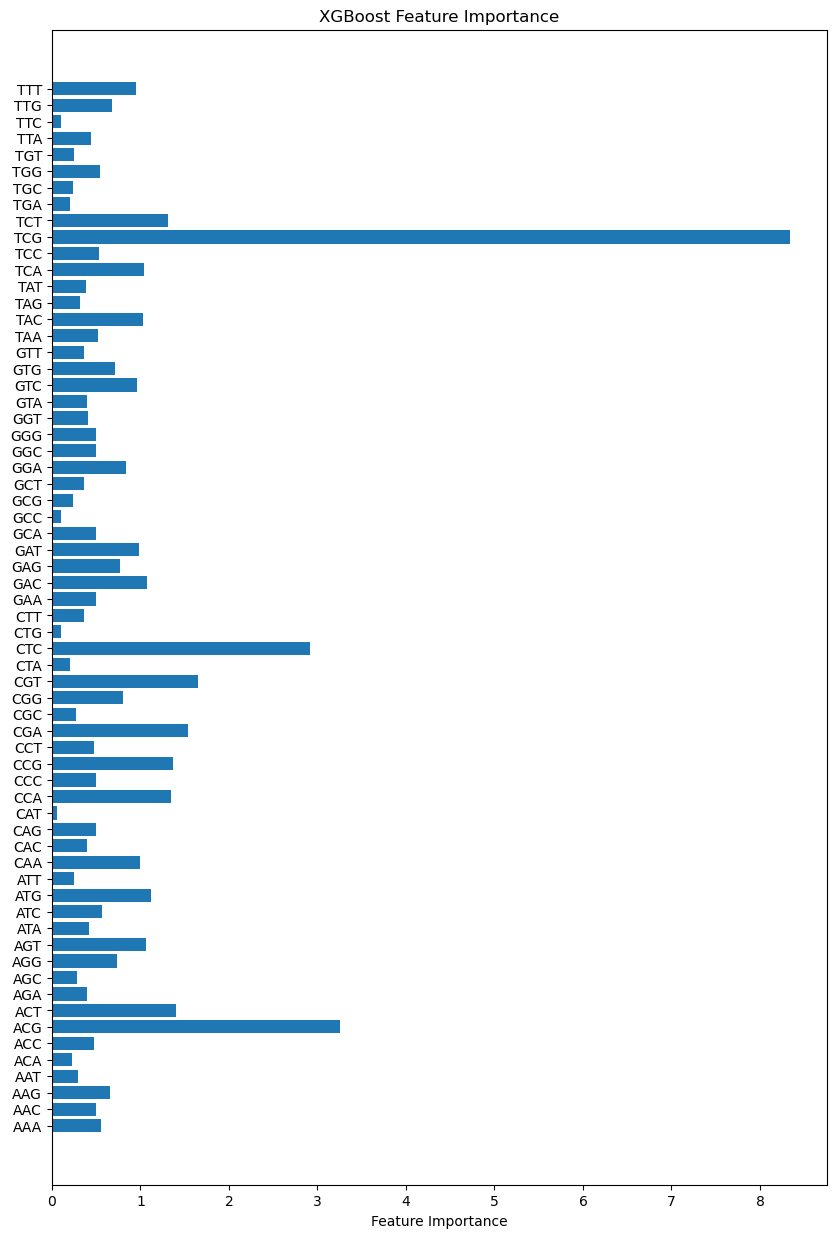

In [26]:
feature_names = X_train.columns
plt.figure(figsize=(10, 15))

plt.barh(range(len(feature_names)), feature_importance_dict.values(), align='center')
plt.yticks(range(len(feature_names)), feature_importance_dict.keys())
plt.xlabel('Feature Importance')
plt.title('XGBoost Feature Importance')

plt.show()

**Model treniran nad podacima na kojima je primenjena SMOTE tehnika**

In [27]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.2],
    'max_leaves': [0, 5],
    'booster': ['gbtree', 'gblinear'],
}

clf = XGBClassifier(objective="multi:softmax", random_state=42, num_class=5)

grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', verbose=4)
grid_search.fit(X_train_SMOTE, y_train_SMOTE)

best_params = grid_search.best_params_

best_clf = XGBClassifier(objective="multi:softmax", random_state=42, num_class=5, **best_params)
best_clf.fit(X_train_SMOTE, y_train_SMOTE)

y_pred_best = best_clf.predict(X_test)
accuracy_best_SMOTE = accuracy_score(y_test, y_pred_best)
precision_best_SMOTE = precision_score(y_test, y_pred_best, average='weighted')
recall_best_SMOTE = recall_score(y_test, y_pred_best, average='weighted')
f1_best_SMOTE = f1_score(y_test, y_pred_best, average='weighted')

classification_rep = classification_report(y_test, y_pred_best)
feature_importance_dict = best_clf.get_booster().get_score(importance_type='gain')

print("\nNajbolji parametri:", best_params)
print("Tacnost modela sa najboljim parametrima:", round(accuracy_best_SMOTE, 5))
print("Precision modela sa najboljim parametrima:", round(precision_best_SMOTE, 5))
print("Recall modela sa najboljim parametrima:", round(recall_best_SMOTE, 5))
print("F1 score modela sa najboljim parametrima:", round(f1_best_SMOTE, 5))
#print("\nIzvestaj o klasifikaciji:\n", classification_rep)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END booster=gbtree, learning_rate=0.1, max_leaves=0, n_estimators=100;, score=0.911 total time=   1.0s
[CV 2/5] END booster=gbtree, learning_rate=0.1, max_leaves=0, n_estimators=100;, score=0.929 total time=   1.2s
[CV 3/5] END booster=gbtree, learning_rate=0.1, max_leaves=0, n_estimators=100;, score=0.959 total time=   1.2s
[CV 4/5] END booster=gbtree, learning_rate=0.1, max_leaves=0, n_estimators=100;, score=0.941 total time=   1.1s
[CV 5/5] END booster=gbtree, learning_rate=0.1, max_leaves=0, n_estimators=100;, score=0.959 total time=   1.1s
[CV 1/5] END booster=gbtree, learning_rate=0.1, max_leaves=0, n_estimators=200;, score=0.914 total time=   1.7s
[CV 2/5] END booster=gbtree, learning_rate=0.1, max_leaves=0, n_estimators=200;, score=0.938 total time=   1.8s
[CV 3/5] END booster=gbtree, learning_rate=0.1, max_leaves=0, n_estimators=200;, score=0.953 total time=   1.8s
[CV 4/5] END booster=gbtree, learning_rate

C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:19:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:19:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/5] END booster=gblinear, learning_rate=0.1, max_leaves=0, n_estimators=100;, score=0.524 total time=   0.1s
[CV 3/5] END booster=gblinear, learning_rate=0.1, max_leaves=0, n_estimators=100;, score=0.524 total time=   0.1s


C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:19:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:19:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 4/5] END booster=gblinear, learning_rate=0.1, max_leaves=0, n_estimators=100;, score=0.556 total time=   0.1s
[CV 5/5] END booster=gblinear, learning_rate=0.1, max_leaves=0, n_estimators=100;, score=0.538 total time=   0.1s


C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:19:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:19:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/5] END booster=gblinear, learning_rate=0.1, max_leaves=0, n_estimators=200;, score=0.541 total time=   0.2s


C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:19:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/5] END booster=gblinear, learning_rate=0.1, max_leaves=0, n_estimators=200;, score=0.553 total time=   0.2s


C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:19:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/5] END booster=gblinear, learning_rate=0.1, max_leaves=0, n_estimators=200;, score=0.541 total time=   0.2s


C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:19:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 4/5] END booster=gblinear, learning_rate=0.1, max_leaves=0, n_estimators=200;, score=0.592 total time=   0.2s


C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:19:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 5/5] END booster=gblinear, learning_rate=0.1, max_leaves=0, n_estimators=200;, score=0.577 total time=   0.2s


C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:19:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/5] END booster=gblinear, learning_rate=0.1, max_leaves=0, n_estimators=300;, score=0.562 total time=   0.4s


C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:19:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/5] END booster=gblinear, learning_rate=0.1, max_leaves=0, n_estimators=300;, score=0.562 total time=   0.4s


C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:19:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/5] END booster=gblinear, learning_rate=0.1, max_leaves=0, n_estimators=300;, score=0.559 total time=   0.4s


C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:19:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 4/5] END booster=gblinear, learning_rate=0.1, max_leaves=0, n_estimators=300;, score=0.624 total time=   0.4s


C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:19:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 5/5] END booster=gblinear, learning_rate=0.1, max_leaves=0, n_estimators=300;, score=0.592 total time=   0.4s
[CV 1/5] END booster=gblinear, learning_rate=0.1, max_leaves=5, n_estimators=100;, score=0.515 total time=   0.1s


C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:19:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:19:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/5] END booster=gblinear, learning_rate=0.1, max_leaves=5, n_estimators=100;, score=0.518 total time=   0.1s
[CV 3/5] END booster=gblinear, learning_rate=0.1, max_leaves=5, n_estimators=100;, score=0.518 total time=   0.1s


C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:19:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:19:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 4/5] END booster=gblinear, learning_rate=0.1, max_leaves=5, n_estimators=100;, score=0.562 total time=   0.1s
[CV 5/5] END booster=gblinear, learning_rate=0.1, max_leaves=5, n_estimators=100;, score=0.536 total time=   0.1s


C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:19:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:19:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/5] END booster=gblinear, learning_rate=0.1, max_leaves=5, n_estimators=200;, score=0.536 total time=   0.2s


C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:19:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/5] END booster=gblinear, learning_rate=0.1, max_leaves=5, n_estimators=200;, score=0.556 total time=   0.2s


C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:19:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/5] END booster=gblinear, learning_rate=0.1, max_leaves=5, n_estimators=200;, score=0.544 total time=   0.2s


C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:19:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 4/5] END booster=gblinear, learning_rate=0.1, max_leaves=5, n_estimators=200;, score=0.589 total time=   0.2s


C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:19:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 5/5] END booster=gblinear, learning_rate=0.1, max_leaves=5, n_estimators=200;, score=0.577 total time=   0.2s


C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:19:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/5] END booster=gblinear, learning_rate=0.1, max_leaves=5, n_estimators=300;, score=0.571 total time=   0.4s


C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:19:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/5] END booster=gblinear, learning_rate=0.1, max_leaves=5, n_estimators=300;, score=0.565 total time=   0.3s


C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:19:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/5] END booster=gblinear, learning_rate=0.1, max_leaves=5, n_estimators=300;, score=0.559 total time=   0.4s


C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:19:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 4/5] END booster=gblinear, learning_rate=0.1, max_leaves=5, n_estimators=300;, score=0.618 total time=   0.4s


C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:19:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 5/5] END booster=gblinear, learning_rate=0.1, max_leaves=5, n_estimators=300;, score=0.589 total time=   0.3s
[CV 1/5] END booster=gblinear, learning_rate=0.2, max_leaves=0, n_estimators=100;, score=0.538 total time=   0.1s


C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:19:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:19:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:19:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/5] END booster=gblinear, learning_rate=0.2, max_leaves=0, n_estimators=100;, score=0.556 total time=   0.1s
[CV 3/5] END booster=gblinear, learning_rate=0.2, max_leaves=0, n_estimators=100;, score=0.547 total time=   0.1s


C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:19:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:19:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 4/5] END booster=gblinear, learning_rate=0.2, max_leaves=0, n_estimators=100;, score=0.589 total time=   0.1s
[CV 5/5] END booster=gblinear, learning_rate=0.2, max_leaves=0, n_estimators=100;, score=0.583 total time=   0.1s


C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:19:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/5] END booster=gblinear, learning_rate=0.2, max_leaves=0, n_estimators=200;, score=0.568 total time=   0.2s


C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:19:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/5] END booster=gblinear, learning_rate=0.2, max_leaves=0, n_estimators=200;, score=0.586 total time=   0.2s


C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:19:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/5] END booster=gblinear, learning_rate=0.2, max_leaves=0, n_estimators=200;, score=0.574 total time=   0.2s


C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:19:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 4/5] END booster=gblinear, learning_rate=0.2, max_leaves=0, n_estimators=200;, score=0.657 total time=   0.2s


C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:19:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 5/5] END booster=gblinear, learning_rate=0.2, max_leaves=0, n_estimators=200;, score=0.598 total time=   0.2s


C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:19:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/5] END booster=gblinear, learning_rate=0.2, max_leaves=0, n_estimators=300;, score=0.615 total time=   0.4s


C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:19:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/5] END booster=gblinear, learning_rate=0.2, max_leaves=0, n_estimators=300;, score=0.615 total time=   0.4s


C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:19:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/5] END booster=gblinear, learning_rate=0.2, max_leaves=0, n_estimators=300;, score=0.612 total time=   0.3s


C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:19:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 4/5] END booster=gblinear, learning_rate=0.2, max_leaves=0, n_estimators=300;, score=0.672 total time=   0.4s


C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:19:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 5/5] END booster=gblinear, learning_rate=0.2, max_leaves=0, n_estimators=300;, score=0.651 total time=   0.3s
[CV 1/5] END booster=gblinear, learning_rate=0.2, max_leaves=5, n_estimators=100;, score=0.536 total time=   0.1s


C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:19:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:19:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/5] END booster=gblinear, learning_rate=0.2, max_leaves=5, n_estimators=100;, score=0.553 total time=   0.1s
[CV 3/5] END booster=gblinear, learning_rate=0.2, max_leaves=5, n_estimators=100;, score=0.547 total time=   0.1s


C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:19:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:19:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 4/5] END booster=gblinear, learning_rate=0.2, max_leaves=5, n_estimators=100;, score=0.589 total time=   0.1s
[CV 5/5] END booster=gblinear, learning_rate=0.2, max_leaves=5, n_estimators=100;, score=0.580 total time=   0.1s


C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:19:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:19:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/5] END booster=gblinear, learning_rate=0.2, max_leaves=5, n_estimators=200;, score=0.568 total time=   0.2s


C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:19:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/5] END booster=gblinear, learning_rate=0.2, max_leaves=5, n_estimators=200;, score=0.586 total time=   0.2s


C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:19:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/5] END booster=gblinear, learning_rate=0.2, max_leaves=5, n_estimators=200;, score=0.574 total time=   0.2s


C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:19:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 4/5] END booster=gblinear, learning_rate=0.2, max_leaves=5, n_estimators=200;, score=0.657 total time=   0.2s


C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:19:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 5/5] END booster=gblinear, learning_rate=0.2, max_leaves=5, n_estimators=200;, score=0.604 total time=   0.2s


C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:19:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/5] END booster=gblinear, learning_rate=0.2, max_leaves=5, n_estimators=300;, score=0.615 total time=   0.4s


C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:19:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/5] END booster=gblinear, learning_rate=0.2, max_leaves=5, n_estimators=300;, score=0.615 total time=   0.4s


C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:19:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/5] END booster=gblinear, learning_rate=0.2, max_leaves=5, n_estimators=300;, score=0.633 total time=   0.3s


C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:19:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 4/5] END booster=gblinear, learning_rate=0.2, max_leaves=5, n_estimators=300;, score=0.663 total time=   0.4s


C:\Users\mihai\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:19:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 5/5] END booster=gblinear, learning_rate=0.2, max_leaves=5, n_estimators=300;, score=0.651 total time=   0.4s

Najbolji parametri: {'booster': 'gbtree', 'learning_rate': 0.2, 'max_leaves': 0, 'n_estimators': 200}
Tacnost modela sa najboljim parametrima: 0.83553
Precision modela sa najboljim parametrima: 0.83841
Recall modela sa najboljim parametrima: 0.83553
F1 score modela sa najboljim parametrima: 0.83627


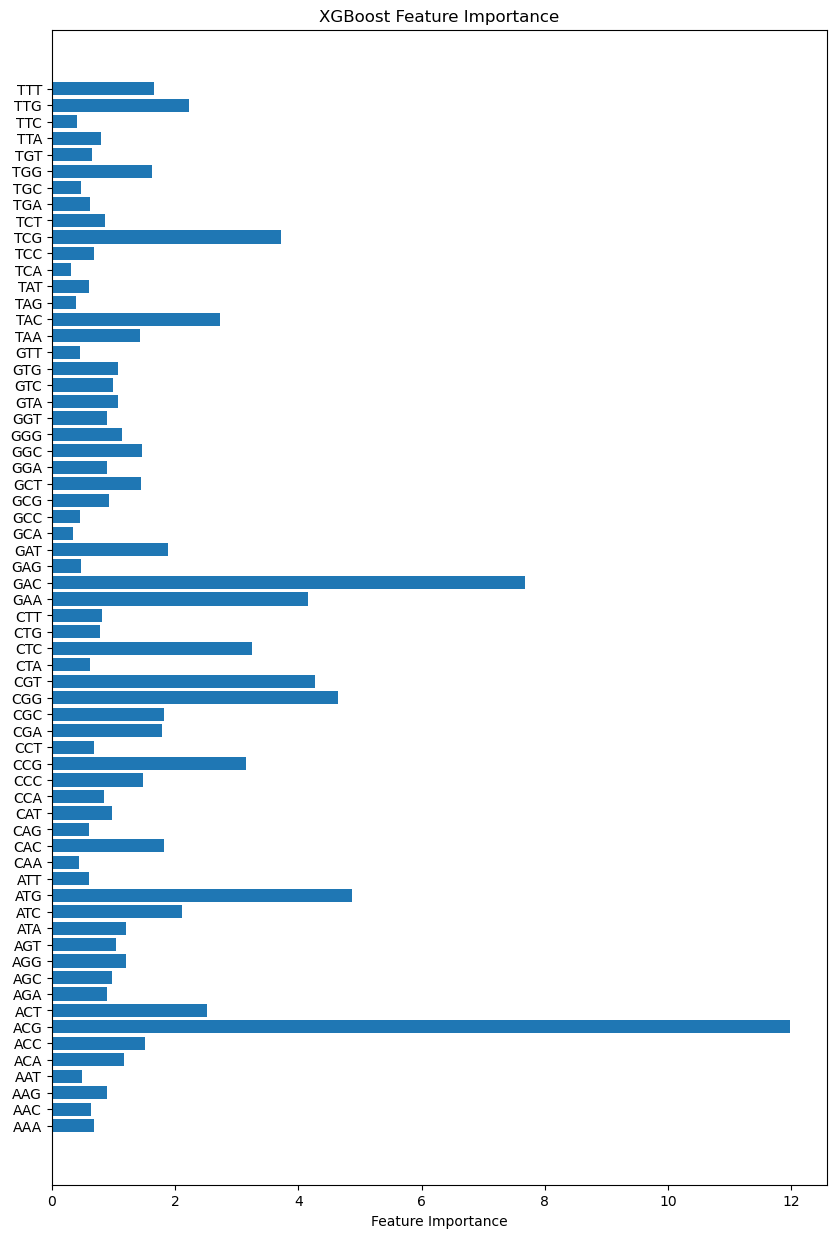

In [28]:
feature_names = X_train_SMOTE.columns
plt.figure(figsize=(10, 15))

plt.barh(range(len(feature_names)), feature_importance_dict.values(), align='center')
plt.yticks(range(len(feature_names)), feature_importance_dict.keys())
plt.xlabel('Feature Importance')
plt.title('XGBoost Feature Importance')

plt.show()

**Poredjenje modela**

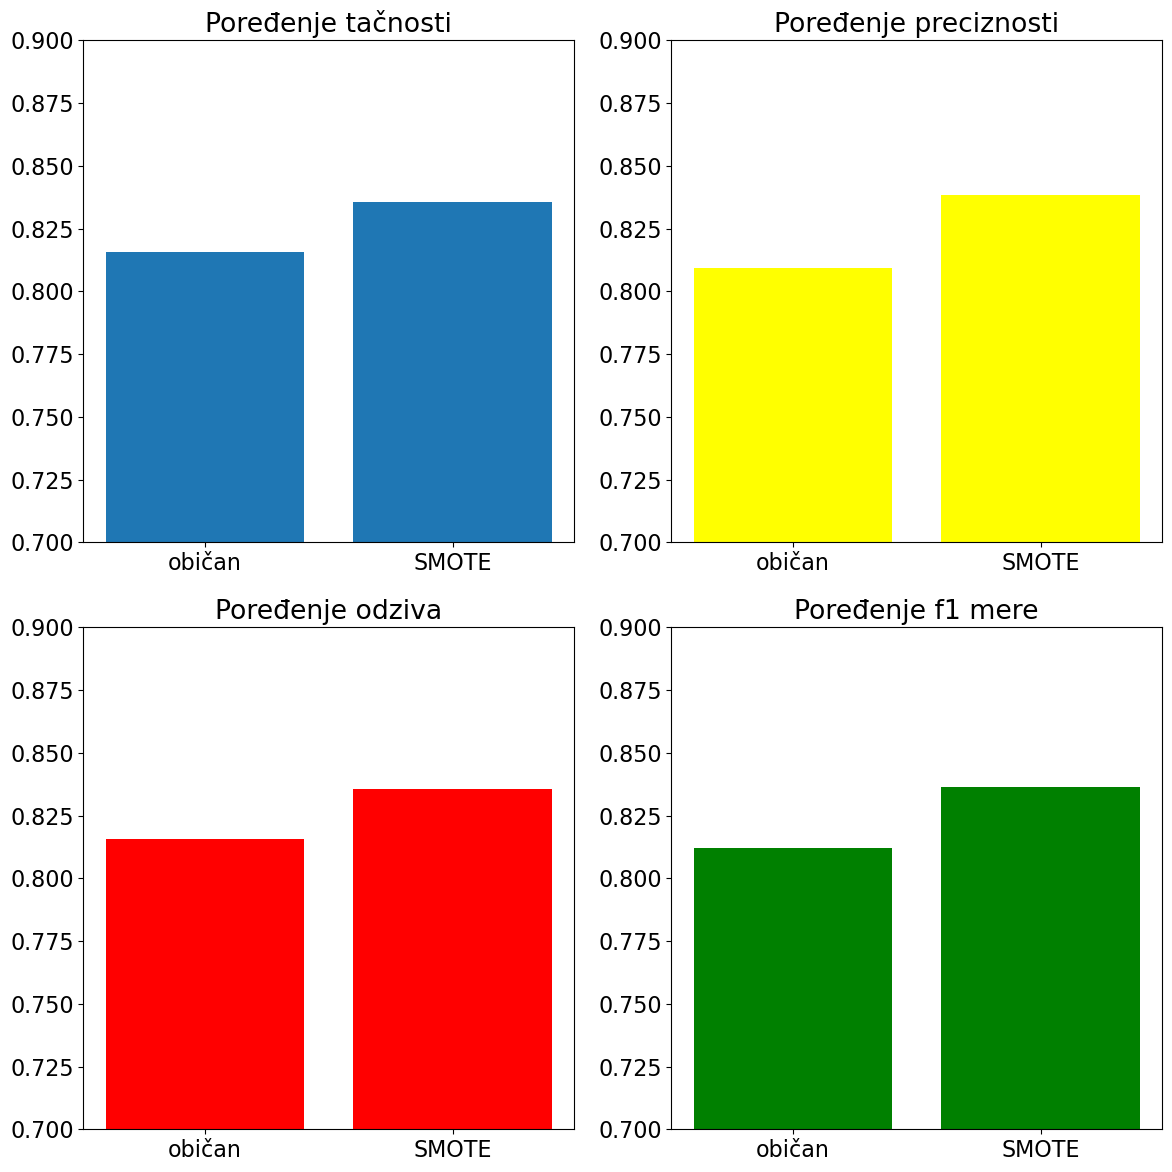

In [32]:
plt.rcParams.update({'font.size': 16})
fig = plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
plt.bar(['običan', 'SMOTE'], [accuracy_best, accuracy_best_SMOTE])
plt.title('Poređenje tačnosti')
plt.ylim(0.7, 0.9)

plt.subplot(2, 2, 2)
plt.bar(['običan', 'SMOTE'], [precision_best, precision_best_SMOTE], color='yellow')
plt.title('Poređenje preciznosti')
plt.ylim(0.7, 0.9)

plt.subplot(2, 2, 3)
plt.bar(['običan', 'SMOTE'], [recall_best, recall_best_SMOTE], color='red')
plt.title('Poređenje odziva')
plt.ylim(0.7, 0.9)

plt.subplot(2, 2, 4)
plt.bar(['običan', 'SMOTE'], [f1_best, f1_best_SMOTE], color='green')
plt.title('Poređenje f1 mere')
plt.ylim(0.7, 0.9)

plt.savefig('XGB_poredjenje.png')
plt.tight_layout()
plt.show()

In [30]:
xgb_best_accuracy = accuracy_best_SMOTE

In [31]:
%store xgb_best_accuracy

Stored 'xgb_best_accuracy' (float64)
